<a href="https://colab.research.google.com/github/catastropiyush/fourier_transforms/blob/main/Fourier_Transforms_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 6.8 MB/s eta 0:00:00


In [2]:
def generate_signal(t):
    return np.sin(2 * np.pi * 2 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

duration = 2         # seconds
sampling_rate = 100  # Hz
t = np.linspace(0, duration, duration * sampling_rate)


signal = generate_signal(t)

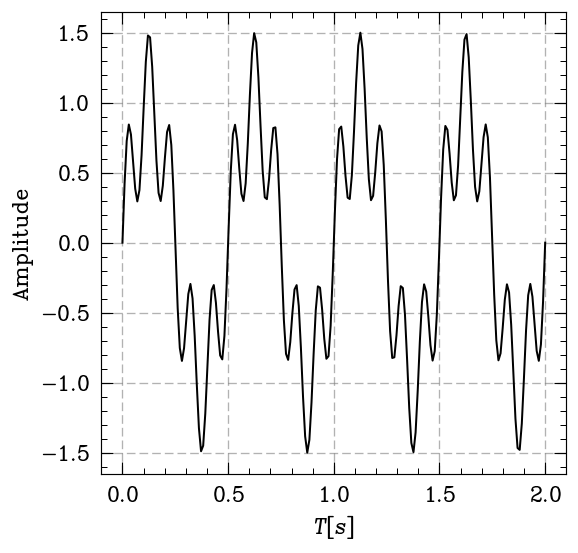

In [8]:
plt.figure(figsize=(5,5))
#plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.xlabel(r'$T [s] $')
plt.ylabel('Amplitude')
plt.grid(True)

In [9]:
frequencies = np.fft.fftfreq(len(t), 1/sampling_rate) # Generate frequency array
ft = np.fft.fft(signal)                               # Compute FFT
ft_magnitude = np.abs(ft) / len(t)                    # Normalize the magnitude

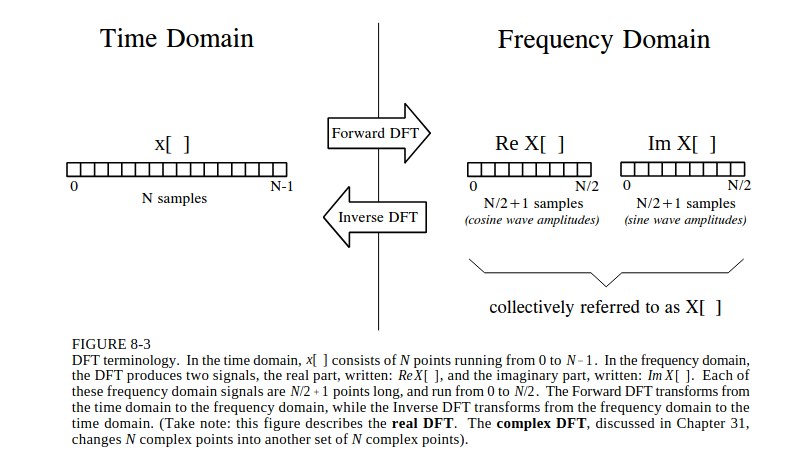

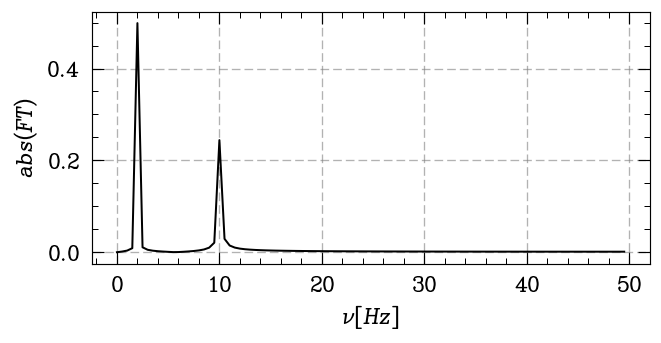

In [15]:
# Frequency domain plot
plt.subplot(2, 1, 2)
positive_freq_mask = frequencies >= 0
plt.plot(frequencies[positive_freq_mask], ft_magnitude[positive_freq_mask])
plt.xlabel(r'$\nu [Hz]$')
plt.ylabel(r'$abs(FT)$')
plt.grid(True)

##Scipy

In [12]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [13]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

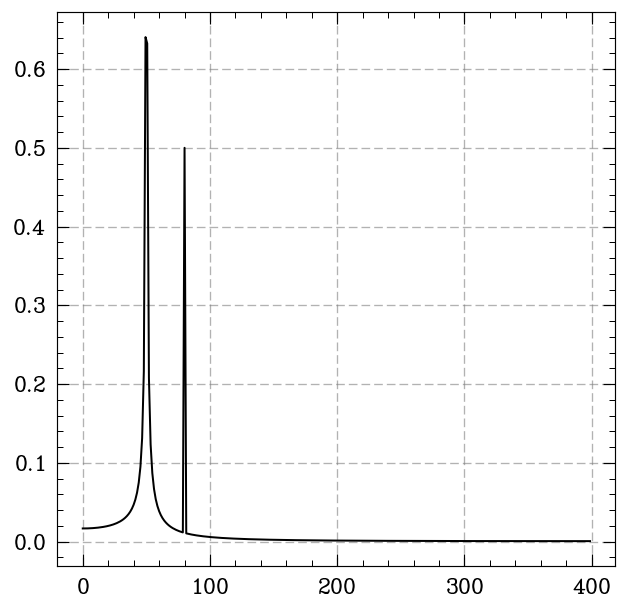

In [14]:
from scipy.fft import fft, fftfreq
import numpy as np
N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

##Sympy

$F(k) = \int_{-\infty}^\infty f(x) e^{-2\pi i x k} \mathrm{d} x.$

In [18]:
import sympy
sympy.init_printing()

In [19]:
from sympy import fourier_transform, exp
from sympy.abc import x, k
fourier_transform(exp(-x**2), x, k)
fourier_transform(exp(-x**2), x, k, noconds=False)

⎛      2  2      ⎞
⎜    -π ⋅k       ⎟
⎝√π⋅ℯ      , True⎠

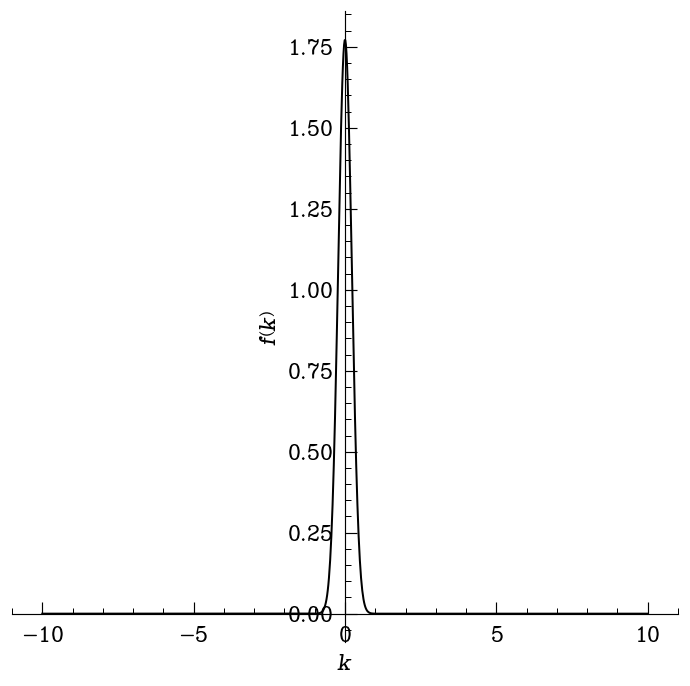

In [22]:
sympy.plot(fourier_transform(exp(-x**2), x, k, noconds=False));

In [20]:
from sympy import inverse_fourier_transform, exp, sqrt, pi
from sympy.abc import x, k
inverse_fourier_transform(sqrt(pi)*exp(-(pi*k)**2), k, x)
inverse_fourier_transform(sqrt(pi)*exp(-(pi*k)**2), k, x, noconds=False)

⎛   2      ⎞
⎜ -x       ⎟
⎝ℯ   , True⎠

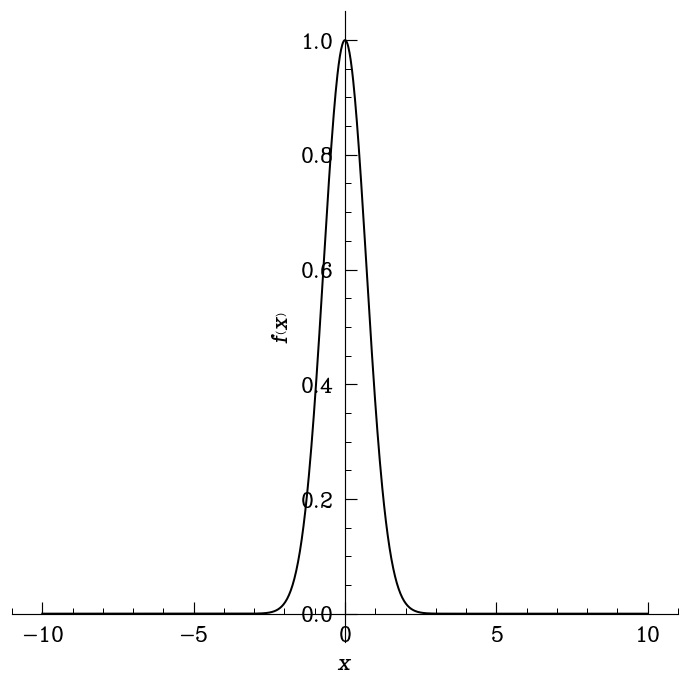

In [21]:
sympy.plot(inverse_fourier_transform(sqrt(pi)*exp(-(pi*k)**2), k, x)
);

https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html#Direct-evaluation

https://lpsa.swarthmore.edu/Fourier/Xforms/FXFS.html

##Laplace Transform

$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s$

In [23]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [24]:
f = sympy.exp(-a*t)
f

 -a⋅t
ℯ    

In [25]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  